# Proyek analisis Data: Bike Sharing Dataset
- **Nama:** Nandisya Faiz Effendi
- **Email:** faizeffendi2004@gmail.com
- **ID Dicoding:** faiz-effendi

# Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda keseluruhan bervariasi antara musim?
- Pengaruh apa yang diberikan oleh suhu dan kelembapan lingkungan pada jumlah peminjaman sepeda?

# Import Semua Packages/Library yang Digunakan

In [1]:
# data process
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# dashboard
import streamlit as st

# Data Wrangling

## Gathering Data

In [2]:
day_df = pd.read_csv('./day.csv')
hour_df = pd.read_csv('./hour.csv') # tidak digunakan 

In [3]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
514,515,2012-05-29,2,1,5,0,2,1,1,0.722500,0.672992,0.684583,0.295400,880,4863,5743
432,433,2012-03-08,1,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382
544,545,2012-06-28,3,1,6,0,4,1,1,0.749167,0.675512,0.422500,0.171650,921,5958,6879
573,574,2012-07-27,3,1,7,0,5,1,1,0.781667,0.734217,0.594583,0.152992,1259,5645,6904
692,693,2012-11-23,4,1,11,0,5,1,1,0.368333,0.378779,0.568750,0.148021,1603,2307,3910


In [4]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5752,5753,2011-09-02,3,0,9,3,0,5,1,2,0.60,0.5606,0.83,0.1642,4,4,8
6200,6201,2011-09-20,3,0,9,22,0,2,1,1,0.56,0.5303,0.94,0.0000,23,125,148
3119,3120,2011-05-14,2,0,5,21,0,6,0,3,0.54,0.5152,0.94,0.2239,15,44,59
11682,11683,2012-05-06,2,1,5,23,0,0,0,1,0.52,0.5000,0.77,0.1940,22,80,102
9061,9062,2012-01-18,1,1,1,11,0,3,1,1,0.30,0.2727,0.42,0.3881,4,110,114


**Insight:**
- perbedaan hanya pada hour.csv memiliki column/feature hr yang mewakilkan hours (0 - 23)

## Assessing Data

### mencari missing value dalam dataframe

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### menghitung banyak duplikasi dalam dataframe

In [6]:
print(f'Duplikasi data: {day_df.duplicated().sum()}')

Duplikasi data: 0


### mencari apakah ada data yang invalid atau tidak sesuai ketentuan

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Identifikasi Outliers kolom casual

In [8]:
q25, q75 = np.percentile(day_df['casual'], 25), np.percentile(day_df['casual'], 75)
iqr = q75-q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers_casual_users = [x for x in day_df['casual'] if x < minimum or x > maximum]

In [9]:
if outliers_casual_users:
    print(f'Banyak outlier pengguna casual: {len(outliers_casual_users)}')
else:
    print('Tidak terdapat outliers')

Banyak outlier pengguna casual: 44


### Identifikasi Outliers kolom registered

In [10]:
q25, q75 = np.percentile(day_df['registered'], 25), np.percentile(day_df['registered'], 75)
iqr = q75-q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers_registered_users = [x for x in day_df['registered'] if x < minimum or x > maximum]

In [11]:
if outliers_registered_users:
    print(f'Banyak outlier pengguna casual: {len(outliers_registered_users)}')
else:
    print('Tidak terdapat outliers')

Tidak terdapat outliers


**Insight:**
- assessing data berdasarkan missing value dan duplicated data menunjukan tidak adanya keanehan dalam data
- berdasarkan descriptive statistics tidak ditemukan adanya data yang invalid
- column/feature casual terdapat 44 data outlier

## Cleaning Data

### mengatasi outlier dengan batas min atau max

In [12]:
day_df['casual'] = day_df['casual'].apply(lambda x: minimum if x < minimum else (maximum if x > maximum else x))

In [13]:
outliers_casual_users = [x for x in day_df['casual'] if x < minimum or x > maximum]

if outliers_casual_users:
    print(f'Banyak outlier pengguna casual: {len(outliers_casual_users)}')
else:
    print('Tidak terdapat outliers\n')

day_df.info()

Tidak terdapat outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### mengganti nama column agar lebih merepresentasikan isinya

In [14]:
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'total_book',
}, inplace=True)

In [15]:
day_df['date'] = pd.to_datetime(day_df['date'])

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  total_book  731 non-null    int64         
dtypes: datetime64[ns](1), floa

### mengubah kolom season ke bentuk categorical agar lebih mudah untuk exploratory

In [17]:
day_df['season'] = day_df['season'].apply(lambda season: 'spring' if season == 1 else ('summer' if season == 2 else ('fall' if season == 3 else 'winter')))

In [18]:
day_df.sample(5)

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_book
607,608,2012-08-30,fall,1,8,0,4,1,1,0.706667,0.652779,0.590417,0.077117,1172,6541,7713
426,427,2012-03-02,spring,1,3,0,5,1,2,0.353333,0.359842,0.657083,0.144904,246,2948,3194
473,474,2012-04-18,summer,1,4,0,3,1,2,0.463333,0.457038,0.569167,0.167912,347,4020,4367
103,104,2011-04-14,summer,0,4,0,4,1,1,0.467500,0.462742,0.540417,0.110700,529,2738,3267
171,172,2011-06-21,fall,0,6,0,2,1,2,0.680833,0.637646,0.770417,0.171025,774,4061,4835


In [19]:
day_df.describe()

,instant,date,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_book
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


# Exploratory Data Analysis (EDA)

## Explore

### mencari korelasi antar kolom

In [20]:
temp_to_total_df = day_df[['temp', 'total_book']]
temp_to_total_df.head()

,temp,total_book
0,0.344167,985
1,0.363478,801
2,0.196364,1349
3,0.200000,1562
4,0.226957,1600


### temuan menarik
kolom temp memiliki correlation positif sedang dengan kolom total_book yang berarti jika salah satu variabel naik variabel lainnya cenderung naik

In [21]:
temp_to_total_df.corr()

,temp,total_book
temp,1.000000,0.627494
total_book,0.627494,1.000000


In [22]:
hum_to_casual_df = day_df[['hum', 'total_book']]
hum_to_casual_df.head()

,hum,total_book
0,0.805833,985
1,0.696087,801
2,0.437273,1349
3,0.590435,1562
4,0.436957,1600


In [23]:
hum_to_casual_df.corr()

,hum,total_book
hum,1.000000,-0.100659
total_book,-0.100659,1.000000


In [24]:
temp_to_registered_df = day_df[['temp', 'registered']]
temp_to_registered_df.head()

,temp,registered
0,0.344167,654
1,0.363478,670
2,0.196364,1229
3,0.200000,1454
4,0.226957,1518


In [25]:
temp_to_registered_df.corr()

,temp,registered
temp,1.000000,0.540012
registered,0.540012,1.000000


In [26]:
weather_to_total_df = day_df[['weathersit', 'total_book']]
weather_to_total_df.sample(10)

,weathersit,total_book
430,1,3956
0,2,985
544,1,6879
128,1,4362
478,2,3214
154,1,5342
203,1,3285
367,1,2236
391,2,3456
534,2,5099


In [27]:
weather_to_total_df.corr()

,weathersit,total_book
weathersit,1.000000,-0.297391
total_book,-0.297391,1.000000


In [28]:
season_to_total_df = day_df.groupby(by='season').agg({
    'instant': 'nunique',
    'casual': 'sum',
    'registered': 'sum',
    'total_book': 'sum',
}).sort_values(by='total_book', ascending=False).reset_index()

season_to_total_df

,season,instant,casual,registered,total_book
0,fall,188,226091,835038,1061129
1,summer,184,203522,715067,918589
2,winter,178,129782,711831,841613
3,spring,181,60622,410726,471348


**Insight:**
- kolom temp memiliki correlation positif sedang dengan kolom total_book sebesar 0.627 ini berarti jika satu variabel naik, varianel lainnya akan cenderung naik tetapi cenderung tidak sekuat correlation 1
- kolom hum memiliki correlation negatif lemah dengan total book namun hubungannya tidak terlalu kuat karena mendekati 0.
- pemesanan terbanyak terjadi saat musim gugur/fall sebanyak 1.061.129 peminjaman.

# Visualization & Explanatory Analysis

## Bagaimana tren penyewaan sepeda keseluruhan bervariasi antara musim?

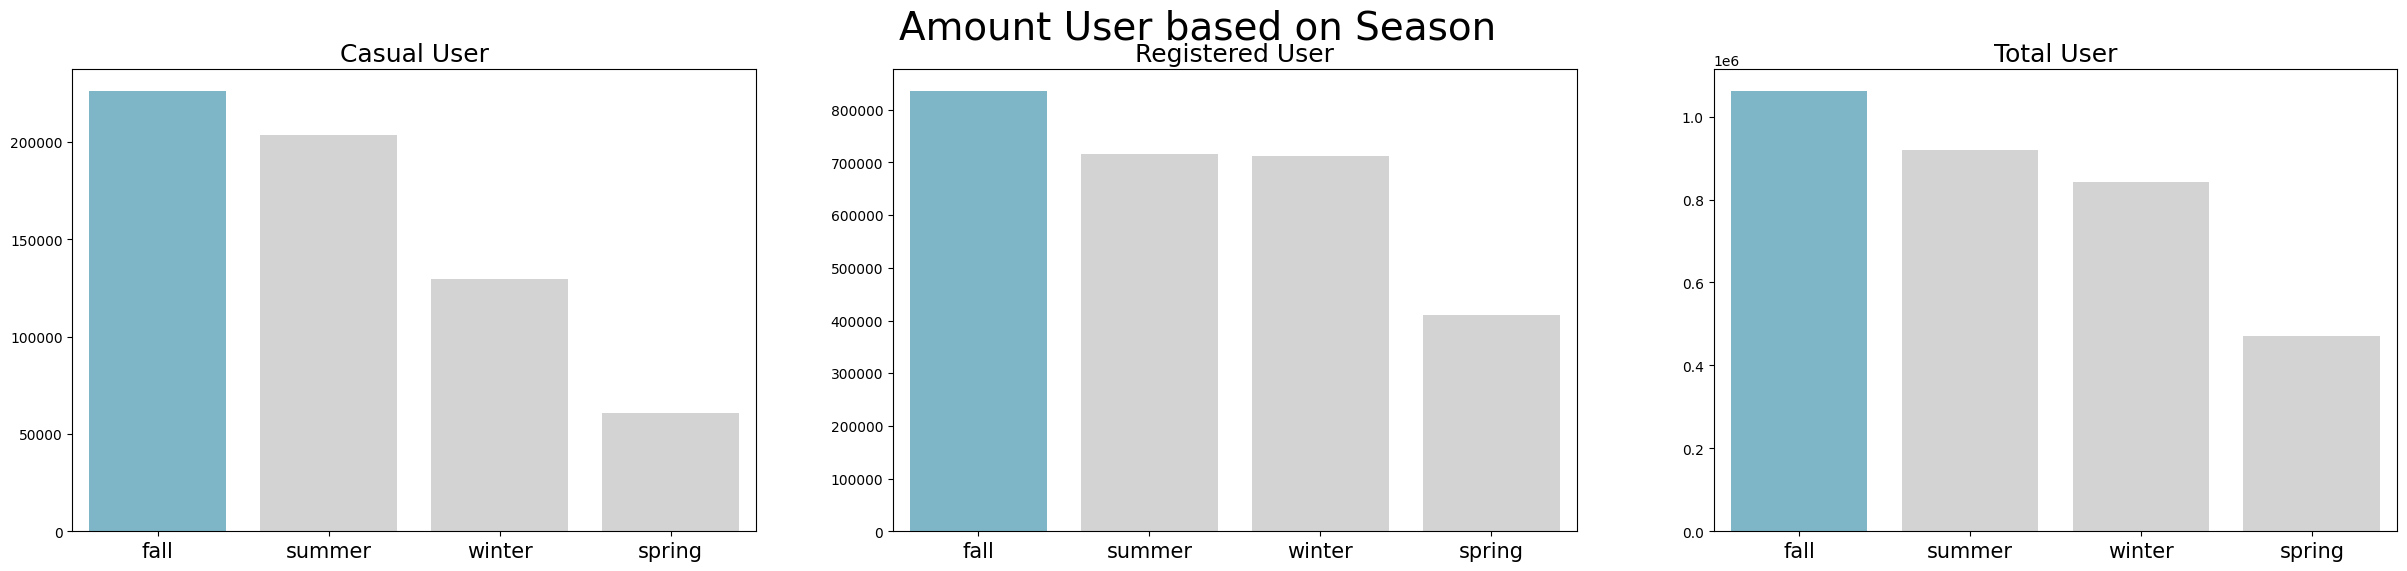

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y='casual', x='season', data=season_to_total_df.sort_values(by='casual', ascending=False), hue='season', palette=colors, legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="registered", x="season", data=season_to_total_df.sort_values(by="registered", ascending=False), hue='season', palette=colors, legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Registered User", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="total_book", x="season", data=season_to_total_df.sort_values(by="total_book", ascending=False), hue='season', palette=colors, legend=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Total User", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Amount User based on Season", fontsize=28)
plt.show()

**Insight:**
- Musim gugur atau fall memiliki user paling banyak baik dari pengguna casual dan registered

# Analisis Lanjutan (Manual Clustering)

## Pengaruh apa yang diberikan oleh suhu dan kelembapan lingkungan pada jumlah peminjaman sepeda?
***kelembapan memiliki relasi yang cukup lemah mendekati 0 sehingga dapat dipastikan hampir tidak berpengaruh terhadap total peminjaman***

***manual grouping temp berdasarkan suhu yang ideal untuk melakukan aktivitas outdoor dengan ketentuan sebagai berikut:***
- 'cold' suhu dingin dengan rentang suhu < 18°C diubah ke satuan yang disepakati menjadi 0.439
- 'ideal' suhu direkomendasikan dengan rentang suhu 18-28°C
- 'hot' suhu panas dengan rentang suhu > 28°C diubah ke satuan yang disepakati menjadi 0.682

In [30]:
temp_to_total_df['temp'] = temp_to_total_df.temp.apply(lambda temp: 'cold' if temp < 0.439 else ('hot' if temp > 0.682 else 'ideal') )

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4068\1764003623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_to_total_df['temp'] = temp_to_total_df.temp.apply(lambda temp: 'cold' if temp < 0.439 else ('hot' if temp > 0.682 else 'ideal') )


In [31]:
temp_to_total_df = temp_to_total_df.groupby(by='temp').total_book.sum().sort_values(ascending=False).reset_index()
temp_to_total_df

,temp,total_book
0,ideal,1479698
1,cold,959182
2,hot,853799


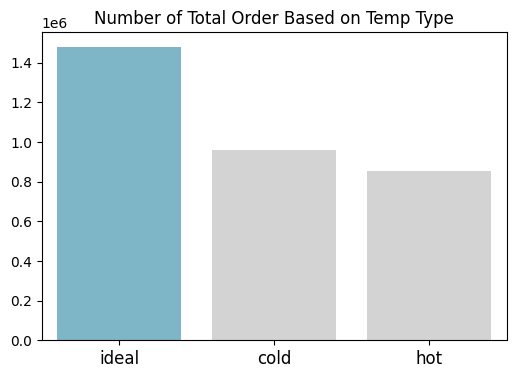

In [32]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(6, 4))
sns.barplot(
    x='temp',
    y='total_book',
    data=temp_to_total_df.sort_values(by='total_book', ascending=False),
    hue='temp',
    palette = colors,
    legend=False
)

plt.title('Number of Total Order Based on Temp Type', loc='center', fontsize=12)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

# Conclusion

- Dapat dilihat musim gugur atau fall season memiliki pengguna paling banyak sebesar 1.061.129 peminjaman baik pengguna casual maupun registered. Kemudian musim panas sebesar 918.589, musim 841.613, dan musim semi 471.348 .
- Suhu ideal yang direkomendasikan untuk melakukan kegiatan outdoor antara 18-28°C, terbukti memiliki peminjaman terbanyak.